In [1]:
import pandas as pd
import pickle 
import numpy as np

In [2]:
df = pd.read_csv("t20_wc.csv")

In [3]:
df.head(10)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
5,2,Australia,Sri Lanka,0.6,3,0,NaN,Melbourne Cricket Ground
6,2,Australia,Sri Lanka,1.1,0,0,NaN,Melbourne Cricket Ground
7,2,Australia,Sri Lanka,1.2,1,0,NaN,Melbourne Cricket Ground
8,2,Australia,Sri Lanka,1.3,0,0,NaN,Melbourne Cricket Ground
9,2,Australia,Sri Lanka,1.4,0,0,NaN,Melbourne Cricket Ground


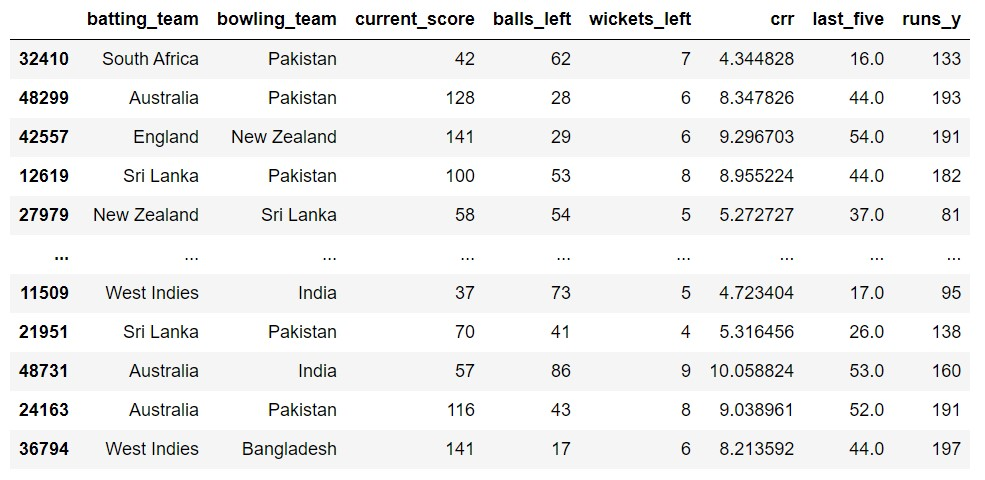

In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [5]:
df.shape

(63888, 8)

In [6]:
df[df["city"].isnull()]

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
63757,963,Australia,Sri Lanka,19.2,1,0,NaN,Pallekele International Cricket Stadium
63758,963,Australia,Sri Lanka,19.3,4,0,NaN,Pallekele International Cricket Stadium
63759,963,Australia,Sri Lanka,19.4,4,0,NaN,Pallekele International Cricket Stadium
63760,963,Australia,Sri Lanka,19.5,6,0,NaN,Pallekele International Cricket Stadium


In [7]:
df[df["city"].isnull()]["venue"].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [8]:
df["city"] = df["city"].mask(df["city"].isnull(),df["venue"].str.split().str.get(0))

In [9]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [10]:
df.drop(columns = ["venue"], inplace = True)

In [11]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo


# Data Filtering
 * Each city should have a record of at least 5 innings played.

In [12]:
df["city"].unique()

array(['Melbourne', 'Victoria', 'Adelaide', 'Napier', 'Mount Maunganui',
       'Auckland', 'Southampton', 'Taunton', 'Cardiff',
       'Chester-le-Street', 'Kanpur', 'Nagpur', 'Bangalore', 'Lauderhill',
       'Dubai', 'Abu Dhabi', 'Sydney', 'Hobart', 'Wellington', 'Hamilton',
       'Bloemfontein', 'Potchefstroom', 'Barbados', 'Trinidad', 'Colombo',
       'St Kitts', 'Jamaica', 'Nelson', 'Ranchi', 'Birmingham',
       'Manchester', 'Bristol', 'Delhi', 'Rajkot', 'Thiruvananthapuram',
       'Lahore', 'Johannesburg', 'Centurion', 'Cape Town', 'Cuttack',
       'Indore', 'Mumbai', 'Dhaka', 'Sylhet', 'Karachi', 'Harare',
       'Carrara', 'Brisbane', 'Dehradun', 'Kolkata', 'Lucknow', 'Chennai',
       'Gros Islet', 'Basseterre', 'Visakhapatnam', 'Bengaluru',
       'Canberra', 'Perth', 'East London', 'Durban', 'Port Elizabeth',
       'Chandigarh', 'Hyderabad', 'Christchurch', 'Providence', 'Kandy',
       'Chattogram', 'Pune', 'Paarl', 'London', 'Nairobi', 'Nottingham',
       'King Ci

In [13]:
(20*6)*5

600

In [14]:
eligible_cities = df["city"].value_counts()

In [15]:
eligible_cities

Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Nairobi           123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: city, Length: 86, dtype: int64

In [16]:
eligible_cities = eligible_cities[eligible_cities > 600].index.tolist()
print(eligible_cities)

['Colombo', 'Mirpur', 'Johannesburg', 'Dubai', 'Auckland', 'Cape Town', 'London', 'Pallekele', 'Barbados', 'Sydney', 'Melbourne', 'Durban', 'St Lucia', 'Wellington', 'Lauderhill', 'Hamilton', 'Centurion', 'Manchester', 'Abu Dhabi', 'Mumbai', 'Nottingham', 'Southampton', 'Mount Maunganui', 'Chittagong', 'Kolkata', 'Lahore', 'Delhi', 'Nagpur', 'Chandigarh', 'Adelaide', 'Bangalore', 'St Kitts', 'Cardiff', 'Christchurch', 'Trinidad']


In [17]:
df = df[df["city"].isin(eligible_cities)]

In [18]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [19]:
df["current_score"] = df.groupby("match_id")["runs"].cumsum()

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\4248034878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["current_score"] = df.groupby("match_id")["runs"].cumsum()


In [20]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [21]:
df["over"] = df["ball"].astype(int)

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\1320338789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["over"] = df["ball"].astype(int)


In [22]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0
...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19


In [23]:
df["ball_no"] = df["ball"].astype(str).str.extract(r"\d.(\d)").astype(int)

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\1849476835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ball_no"] = df["ball"].astype(str).str.extract(r"\d.(\d)").astype(int)


In [24]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [25]:
df["total_delivers"] = (df["over"]*6) + df["ball_no"]

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\2800681878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_delivers"] = (df["over"]*6) + df["ball_no"]


In [26]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [27]:
df["balls_left"] = 120 - df["total_delivers"]
df

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\1204858694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["balls_left"] = 120 - df["total_delivers"]


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [28]:
df["balls_left"].mask(df["balls_left"] < 0, 0, inplace = True)

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\1038864737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["balls_left"].mask(df["balls_left"] < 0, 0, inplace = True)


In [29]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [30]:
df["player_dismissed"].unique()

array(['0', 'M Klinger', 'AJ Finch', 'MC Henriques', 'TM Head',
       'AJ Turner', 'TD Paine', 'BR Dunk', 'JP Faulkner', 'L Ronchi',
       'KS Williamson', 'CJ Anderson', 'C Munro', 'C de Grandhomme',
       'JDS Neesham', 'MJ Santner', 'TC Bruce', 'Q de Kock',
       'F du Plessis', 'HM Amla', 'AB de Villiers', 'F Behardien',
       'JP Duminy', 'JT Smuts', 'RR Hendricks', 'DA Miller', 'JJ Roy',
       'AD Hales', 'DJ Malan', 'SW Billings', 'LS Livingstone',
       'LE Plunkett', 'JC Buttler', 'DJ Willey', 'V Kohli', 'SK Raina',
       'Yuvraj Singh', 'KL Rahul', 'MK Pandey', 'HH Pandya', 'A Mishra',
       'MS Dhoni', 'J Charles', 'AD Russell', 'E Lewis', 'CR Brathwaite',
       'KA Pollard', 'LMP Simmons', 'MN Samuels', 'ADS Fletcher',
       'DJ Bravo', 'S Badree', 'N Pooran', 'SP Narine', 'JE Taylor',
       'Sharjeel Khan', 'Babar Azam', 'Khalid Latif', 'Shoaib Malik',
       'CAK Walton', 'MJ Guptill', 'TA Blundell', 'LRPL Taylor',
       'TG Southee', 'IS Sodhi', 'JM Vince', 

In [31]:
df["player_dismissed"] = df["player_dismissed"].mask(df["player_dismissed"] != "0", 1).astype(int)

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\2603018163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["player_dismissed"] = df["player_dismissed"].mask(df["player_dismissed"] != "0", 1).astype(int)


In [32]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,1,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [33]:
df["player_dismissed"] = df.groupby("match_id")["player_dismissed"].cumsum()

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\3595609500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["player_dismissed"] = df.groupby("match_id")["player_dismissed"].cumsum()


In [34]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0


In [35]:
df["wicket_left"] = 10 - df["player_dismissed"]
df

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\583684324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wicket_left"] = 10 - df["player_dismissed"]


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wicket_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [36]:
df["crr"] = (df["current_score"]*6)/df["total_delivers"]
df

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\916546317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["crr"] = (df["current_score"]*6)/df["total_delivers"]


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wicket_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [37]:
df["last_five"] = df.groupby("match_id")["runs"].rolling(window=30).sum().values.tolist()

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\504412878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["last_five"] = df.groupby("match_id")["runs"].rolling(window=30).sum().values.tolist()


In [38]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wicket_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [41]:
total_run_table = df.groupby("match_id")["runs"].sum().reset_index()

In [42]:
total_run_table

,match_id,runs
0,2,168
1,4,187
2,10,195
3,11,194
4,12,185
...,...,...
411,958,129
412,960,150
413,961,120
414,963,263


In [43]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wicket_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
63884,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
63885,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
63886,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [44]:
df = df.merge(total_run_table, on = "match_id")

In [45]:
df

,match_id,batting_team,bowling_team,ball,runs_x,player_dismissed,city,current_score,over,ball_no,total_delivers,balls_left,wicket_left,crr,last_five,runs_y
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN,168
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN,168
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN,168
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN,168
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0,128
50497,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0,128
50498,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0,128
50499,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0,128


In [46]:
df.columns

Index(['match_id', 'batting_team', 'bowling_team', 'ball', 'runs_x',
       'player_dismissed', 'city', 'current_score', 'over', 'ball_no',
       'total_delivers', 'balls_left', 'wicket_left', 'crr', 'last_five',
       'runs_y'],
      dtype='object')

In [47]:
final_df = \
df[['batting_team', 'bowling_team',"current_score",'balls_left', 'wicket_left', 'crr', 'last_five','runs_y']]

In [48]:
final_df

,batting_team,bowling_team,current_score,balls_left,wicket_left,crr,last_five,runs_y
0,Australia,Sri Lanka,0,119,10,0.000000,NaN,168
1,Australia,Sri Lanka,0,118,10,0.000000,NaN,168
2,Australia,Sri Lanka,1,117,10,2.000000,NaN,168
3,Australia,Sri Lanka,3,116,10,4.500000,NaN,168
4,Australia,Sri Lanka,3,115,10,3.600000,NaN,168
...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,125,3,2,6.410256,32.0,128
50497,Sri Lanka,Australia,125,2,2,6.355932,32.0,128
50498,Sri Lanka,Australia,125,1,1,6.302521,32.0,128
50499,Sri Lanka,Australia,127,0,1,6.350000,33.0,128


In [49]:
final_df.isnull().sum()

batting_team         0
bowling_team         0
current_score        0
balls_left           0
wicket_left          0
crr                  0
last_five        12024
runs_y               0
dtype: int64

In [50]:
final_df.dropna(inplace = True)

C:\Users\techm\AppData\Local\Temp\ipykernel_9592\1587496580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace = True)


In [51]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
current_score    0
balls_left       0
wicket_left      0
crr              0
last_five        0
runs_y           0
dtype: int64

In [54]:
final_df = final_df.sample(final_df.shape[0])

In [55]:
final_df

,batting_team,bowling_team,current_score,balls_left,wicket_left,crr,last_five,runs_y
30444,West Indies,England,78,47,8,6.410959,23.0,125
8915,New Zealand,Pakistan,90,36,6,6.428571,25.0,153
6899,Sri Lanka,South Africa,72,54,7,6.545455,30.0,134
4310,England,India,92,56,9,8.625000,39.0,159
43506,South Africa,Bangladesh,56,69,8,6.588235,30.0,148
...,...,...,...,...,...,...,...,...
29135,India,West Indies,154,1,4,7.764706,65.0,159
34676,West Indies,New Zealand,47,77,9,6.558140,27.0,209
25414,Australia,Sri Lanka,87,36,5,6.214286,27.0,168
5526,India,Sri Lanka,56,75,8,7.466667,46.0,174


In [56]:
X = final_df.drop(columns = ["runs_y"])
y = final_df["runs_y"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [60]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False),['batting_team','bowling_team'])
]
,remainder='passthrough')

In [61]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [62]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

C:\Users\techm\anaconda_3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9524402266951423
3.496026881767162


In [63]:
pickle.dump(pipe, open("pipe.pkl","wb"))

In [64]:
import xgboost
xgboost.__version__

'2.0.0'

In [66]:
X_test.shape

(7696, 7)